In [179]:
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import os
from wordcloud import WordCloud, STOPWORDS

In [180]:
paths = os.listdir('eda-dataset/BBC News Summary/News Articles')
articles_path = 'eda-dataset/BBC News Summary/News Articles/'
summaries_path = 'eda-dataset/BBC News Summary/Summaries/'

articles = []
summaries = []
file_arr = []
cat_arr = []

for path in paths:
    files = os.listdir(articles_path + path)
    for file in files:
        article_file_path = articles_path + path + '/' + file
        summary_file_path = summaries_path + path + '/' + file
        try:
            with open (article_file_path,'r') as f:
                articles.append('.'.join([line.rstrip() for line in f.readlines()]))
            with open (summary_file_path,'r') as f:
                summaries.append('.'.join([line.rstrip() for line in f.readlines()]))
            file_arr.append(path + '/' + file)
            cat_arr.append(path)
        except:
            pass



In [181]:
def get_headline(text):
    return text.split('.')[0]

In [182]:
pd.set_option('display.max_colwidth', 200)
df = pd.DataFrame({'path':file_arr, 'label':cat_arr, 'article': articles,'summary':summaries})
df['headline'] = df['article'].apply(get_headline)

In [183]:
# make headline the 3rd column
cols = df.columns.tolist()
cols = cols[:2] + cols[-1:] + cols[2:-1]
df = df[cols]

In [184]:
df.head(2)

,path,label,headline,article,summary
0,business/001.txt,business,Ad sales boost Time Warner profit,"Ad sales boost Time Warner profit..Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier...The firm, which is now o...","TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn.For the full-year, TimeWarner posted a profit of $3.36bn, up 27% from its 2003 performance, while revenues grew 6.4% to $42.09b..."
1,business/002.txt,business,Dollar gains on Greenspan speech,Dollar gains on Greenspan speech..The dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise...And Al...,The dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise.China's currency remains pegged to the dol...


In [185]:
# Function to count the number of words in a text
def count_words(text):
    return len(text.split())

df['wordcnt_article'] = df['article'].apply(count_words)
df['wordcnt_summary'] = df['summary'].apply(count_words)
df.head(2)

,path,label,headline,article,summary,wordcnt_article,wordcnt_summary
0,business/001.txt,business,Ad sales boost Time Warner profit,"Ad sales boost Time Warner profit..Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier...The firm, which is now o...","TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn.For the full-year, TimeWarner posted a profit of $3.36bn, up 27% from its 2003 performance, while revenues grew 6.4% to $42.09b...",416,134
1,business/002.txt,business,Dollar gains on Greenspan speech,Dollar gains on Greenspan speech..The dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise...And Al...,The dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise.China's currency remains pegged to the dol...,381,158


In [186]:
df.describe()

,wordcnt_article,wordcnt_summary
count,2224.000000,2224.000000
mean,379.286871,165.151529
std,235.081995,108.678038
min,87.000000,38.000000
25%,242.000000,103.000000
50%,327.000000,142.000000
75%,465.250000,202.000000
max,4377.000000,2073.000000


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   path             2224 non-null   object
 1   label            2224 non-null   object
 2   headline         2224 non-null   object
 3   article          2224 non-null   object
 4   summary          2224 non-null   object
 5   wordcnt_article  2224 non-null   int64 
 6   wordcnt_summary  2224 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 121.8+ KB


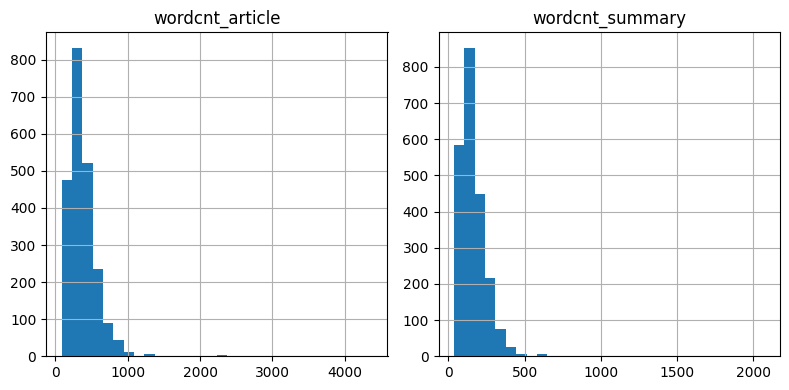

In [188]:
numerical_columns = df.select_dtypes(include=['int64'])

# Create histograms for all numerical columns
numerical_columns.hist(bins=30, figsize=(8, 4))  # Adjust 'bins' and 'figsize' as needed
plt.tight_layout()  # Ensure proper spacing between plots

plt.show()

In [189]:
filtered_df = df[df['wordcnt_article'] < 500]
filtered_df.describe()

,wordcnt_article,wordcnt_summary
count,1783.000000,1783.000000
mean,301.922042,131.076276
std,97.529892,44.171673
min,87.000000,38.000000
25%,225.000000,96.000000
50%,291.000000,126.000000
75%,380.000000,164.000000
max,499.000000,275.000000


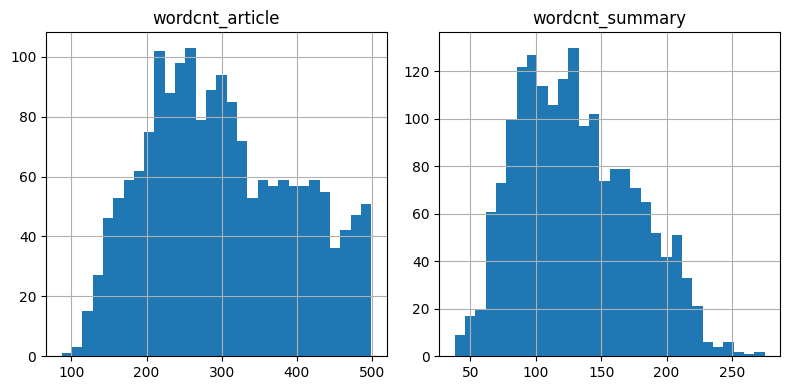

In [190]:
numerical_columns = filtered_df.select_dtypes(include=['int64'])

# Create histograms for all numerical columns
numerical_columns.hist(bins=30, figsize=(8, 4))  # Adjust 'bins' and 'figsize' as needed
plt.tight_layout()  # Ensure proper spacing between plots

plt.show()

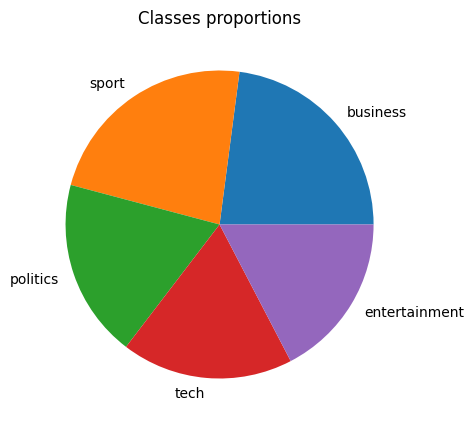

In [191]:
# target
label_count = df['label'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(label_count.values, labels=label_count.index)
plt.title('Classes proportions')
plt.show()

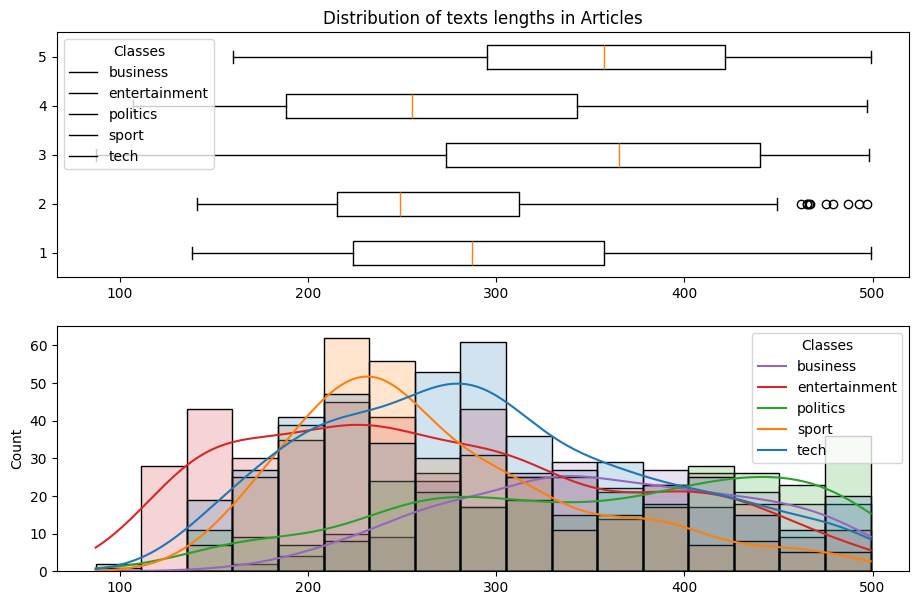

In [192]:
# Articles statistics + boxplot
texts = filtered_df['article']
text_lens = [[len(t.split()) for t in texts[filtered_df['label'] == label]] for label in filtered_df['label'].unique()]

fig, axes = plt.subplots(2, 1, figsize=(11, 7), dpi=100)
axes = axes.flatten()


axes[0].boxplot(text_lens, vert=False)
sns.histplot(text_lens, ax=axes[1], alpha=0.2, palette=sns.color_palette()[:5], kde=True)

    
axes[0].legend(filtered_df['label'].unique(), title='Classes')
axes[1].legend(filtered_df['label'].unique(), title='Classes')

axes[0].set_title('Distribution of texts lengths in Articles')

plt.show()

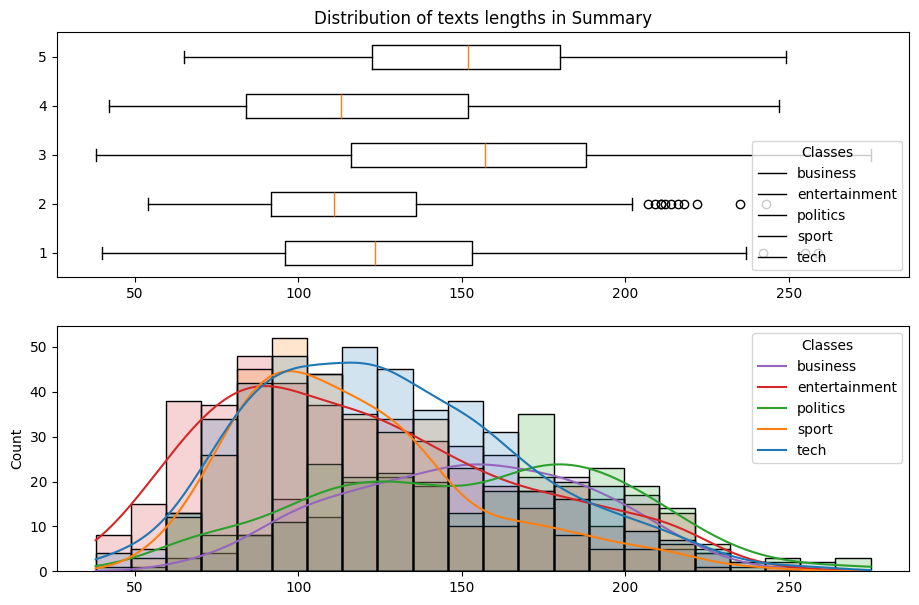

In [193]:
# Articles statistics + boxplot
texts = filtered_df['summary']
text_lens = [[len(t.split()) for t in texts[filtered_df['label'] == label]] for label in filtered_df['label'].unique()]

fig, axes = plt.subplots(2, 1, figsize=(11, 7), dpi=100)
axes = axes.flatten()


axes[0].boxplot(text_lens, vert=False)
sns.histplot(text_lens, ax=axes[1], alpha=0.2, palette=sns.color_palette()[:5], kde=True)

    
axes[0].legend(filtered_df['label'].unique(), title='Classes')
axes[1].legend(filtered_df['label'].unique(), title='Classes')

axes[0].set_title('Distribution of texts lengths in Summary')

plt.show()

In [194]:
tags_values = df.label.value_counts()
tags_values

label
business         510
sport            510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

In [195]:
#Creating a list of text belonging to individual category of articles
heading_sport = df[df["label"]=='sport']["headline"]
#print(heading_sport)
collapsed_heading_sport =heading_sport.str.cat(sep = ' ')
#print(collapsed_heading_sport)

heading_business = df[df["label"]=='business']["headline"]
collapsed_heading_business =heading_business.str.cat(sep = ' ')

heading_politics = df[df["label"]=='politics']["headline"]
collapsed_heading_politics =heading_politics.str.cat(sep = ' ')

heading_tech = df[df["label"]=='tech']["headline"]
collapsed_heading_tech =heading_tech.str.cat(sep = ' ')

heading_entertainment = df[df["label"]=='entertainment']["headline"]
collapsed_heading_entertainment =heading_entertainment.str.cat(sep = ' ')

In [196]:
#Creating List of Stopwords
stopwords = set(STOPWORDS)

Word Cloud for sports


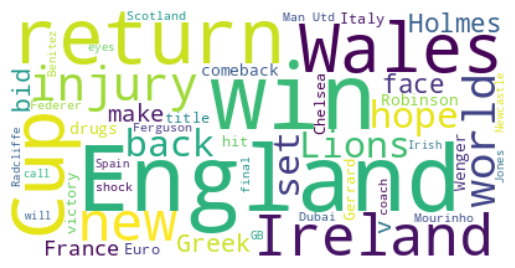

In [197]:
# Generate a word cloud image
print("Word Cloud for sports")
wordcloud = WordCloud(stopwords = stopwords,background_color = "white",max_words = 50).generate(collapsed_heading_sport)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

Word Cloud for business


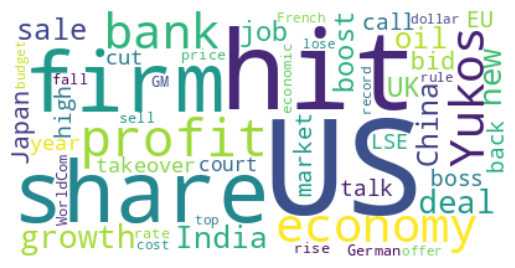

In [198]:
print("Word Cloud for business")
wordcloud = WordCloud(stopwords = stopwords,background_color = "white",max_words = 50).generate(collapsed_heading_business)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

Word Cloud for politics


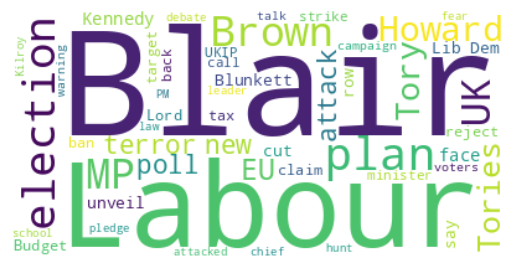

In [199]:
print("Word Cloud for politics")
wordcloud = WordCloud(stopwords = stopwords,background_color = "white",max_words = 50).generate(collapsed_heading_politics)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

Word Cloud for tech


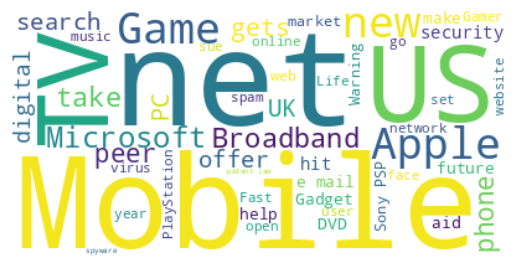

In [200]:
print("Word Cloud for tech")
wordcloud = WordCloud(stopwords = stopwords,background_color = "white",max_words = 50).generate(collapsed_heading_tech)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

Word Cloud for entertainment


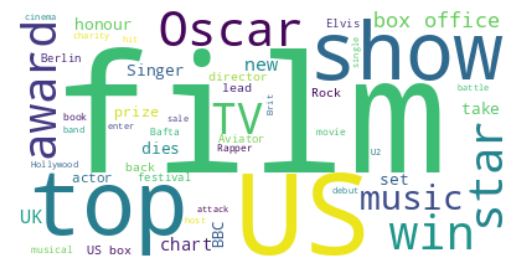

In [201]:
print("Word Cloud for entertainment")
wordcloud = WordCloud(stopwords = stopwords,background_color = "white",max_words = 50).generate(collapsed_heading_entertainment)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()